[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/royforestano/Deep_Learning_Symmetries/blob/main/sym_demo.ipynb)

# Deep Learning Symmetries and Their Lie Groups, Algebras, and Subalgebras from First Principles - Demonstration

Author: Roy Forestano

Date of Completion: 13 January 2023

Connected to the paper on: Deep Learning Symmetries and Their Lie Groups, Algebras, and Subalgebras from First Principles (arXiv:2301.05638: https://arxiv.org/abs/2301.05638)

This notebook will reproduce examples in the paper.

In [1]:
!pip install torch

In [2]:
from sym_utils import *
%matplotlib inline

In [3]:
def oracle_norm(data):
    return torch.norm(data,dim=1)

#if n_dim==4:
def oracle_lorentz(data):
     return (data[:,0].reshape(data.shape[0],1))**2 \
             - (data[:,1].reshape(data.shape[0],1))**2 \
             - (data[:,2].reshape(data.shape[0],1))**2 \
             - (data[:,3].reshape(data.shape[0],1))**2   #- torch.sum( (data[:,1:].reshape(data.shape[0],3))**2,dim=1)

#if n_dim==2:
def oracle_squeeze(data):
    return (data[:,0]*data[:,1]).reshape(data.shape[0],1)

def oracle_piecewise_linear(data):
    a = data[:,0]
    b = -data[:,1]
    return torch.where(a >= 0, a, b)

def oracle_manhattan(data):
    return torch.abs(data[:,0])+torch.abs(data[:,1])

---

# How to run all relevant functions from sym_utils.py

## Choose Dimensions, Generators, Oracle, and Model Hyperparameters

In [4]:
n       = 300
n_dim   = 3
n_gen   = 3    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 1000
oracle = oracle_norm

## Run the Model and View the Training Loss

Using cpu device
Epoch 1000   |  Train Loss: 1.0663575439514303e-05
Total Time: 8.96193600
Complete.


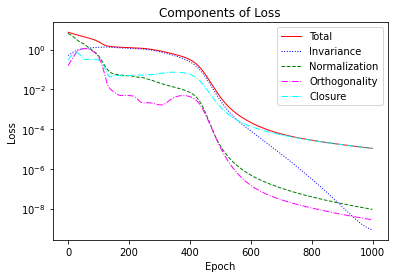

In [5]:
# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)

struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle)

## Visualize Results

Create a Symmetry Vector Plot (for $n_{dim} = 2$)

In [6]:
if n_dim==2:
    draw_sym_vectors(M = gens_pred[0], oracle=oracle)
#plt.savefig(path+'sym_vec_norm.pdf')

View the Resulting Generator(s)

In [7]:
#path = 'plots/'

Generator 1: 
 tensor([[-4.7289e-04, -8.3947e-01, -5.0914e-01],
        [ 8.3956e-01, -3.6253e-04,  1.8964e-01],
        [ 5.0900e-01, -1.9004e-01, -1.6280e-04]]) 

Generator 2: 
 tensor([[-4.5512e-04,  5.4306e-01, -7.9824e-01],
        [-5.4287e-01, -1.8588e-04,  2.6079e-01],
        [ 7.9836e-01, -2.6033e-01, -3.5481e-04]]) 

Generator 3: 
 tensor([[-7.1503e-05, -1.9059e-02, -3.2183e-01],
        [ 1.8764e-02, -4.3666e-04, -9.4663e-01],
        [ 3.2186e-01,  9.4662e-01, -4.8628e-04]]) 



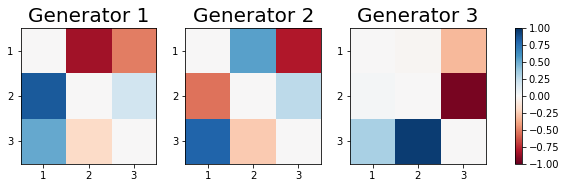

In [8]:
figsizeg = (12,2.5)
rows = 1
cols = 3

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)
#plt.savefig(path+'so3ng3.pdf')

Visualize Rotation Axis Results for  $n_{dim} = 3$, $n_{gen} = 3$

Axis 1: [-0.189838 -0.509071 0.839528]
Axis 2: [0.260557 0.798310 0.542965]
Axis 3: [0.946604 -0.321844 0.018905]


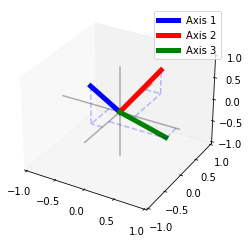

In [9]:
if n_gen==3 and n_dim==3:
    visualize_generator_axes(gens_pred)
#plt.savefig(path+'so3ng3_axes.pdf')

View the Resulting Structure Constants (for $n_{gen}>1$)

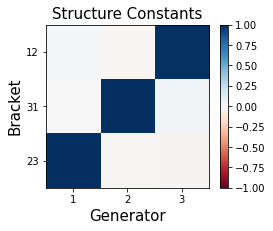

In [10]:
if n_gen>1:
    figsizec=(4,3)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)
#plt.savefig('so3_sc.png',bbox_inches='tight')

## Verify Results

Verify the Structure Constants Produce an Algebra (for $n_{gen}>1$)

In [11]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [0.017815 -0.023160 0.984890]
 
 C = 
  [[-0.000317 0.026862 -0.014158]
 [-0.027634 0.000832 -0.011666]
 [0.014358 0.011576 0.000459]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.011984755043286244. 
 

31: 
 Structure Constants = [-0.003899 1.009901 0.025461]
 
 C = 
  [[0.000270 -0.008417 0.013760]
 [0.007870 0.000831 0.021938]
 [-0.014479 -0.022601 -0.000074]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.010026740119474126. 
 

23: 
 Structure Constants = [1.017229 -0.007850 -0.024331]
 
 C = 
  [[0.000338 0.018127 -0.004934]
 [-0.018334 0.000939 -0.024371]
 [0.005708 0.024127 -0.000293]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.010796919305456357. 
 

Total MAE = 0.03280841446821672


Verify Orthogonality (for $n_{gen}>1$)

In [12]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: -0.0000264038 rad, 90.0015128290 deg
Angle between generator 1 and 3: 0.0000114697 rad, 89.9993428343 deg
Angle between generator 2 and 3: -0.0000225576 rad, 90.0012924545 deg


---

# Orthogonal Groups: Figures 1-3: $n_{dim} = 2$, $n_{gen}=1,2$

##  $n_{dim} = 2$, $n_{gen}=1$

Using cpu device


/opt/anaconda3/lib/python3.8/site-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Epoch 1000   |  Train Loss: 2.4026108330368307e-10
Total Time: 2.50022197
Complete.


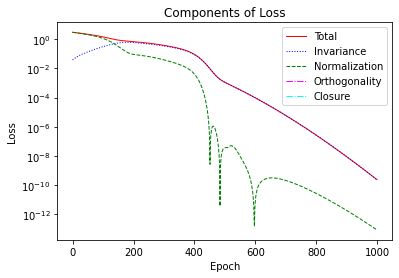

In [13]:
n       = 300
n_dim   = 2
n_gen   = 1    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 1000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)

struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle)

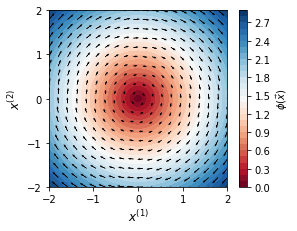

In [14]:
if n_dim==2:
    draw_sym_vectors(M = gens_pred[0], oracle=oracle)

Generator: 
 tensor([[-5.1028e-04,  9.9999e-01],
        [-1.0000e+00, -4.8486e-04]]) 



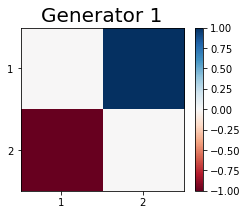

In [15]:
figsizeg = (4,3)
rows = 1
cols = 1

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

##  $n_{dim} = 2$, $n_{gen}=2$

Using cpu device
Epoch 1000   |  Train Loss: 1.6345448674360976
Total Time: 6.00433898
Complete.


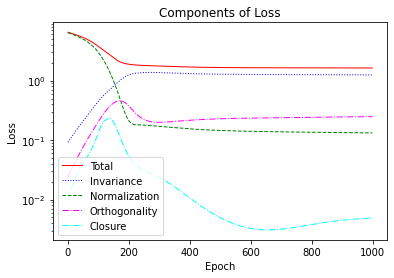

In [16]:
n       = 300
n_dim   = 2
n_gen   = 2    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 1000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)

struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle)

Generator 1: 
 tensor([[ 0.5370,  0.7338],
        [-0.6690,  0.6594]]) 

Generator 2: 
 tensor([[ 0.4641, -0.7600],
        [ 0.8275,  0.5520]]) 



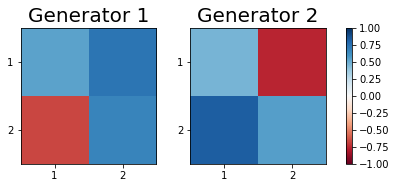

In [17]:
figsizeg = (8,2.5)
rows = 1
cols = 2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

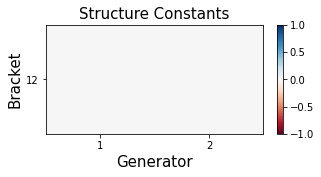

In [18]:
if n_gen>1:
    figsizec=(5,2)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [19]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.001704 0.001815]
 
 C = 
  [[0.098749 0.160243]
 [0.157535 -0.098555]] 

The structure constants were NOT found successfully with a mean absolute error (MAE) of 0.1287704797154237. 
 

Total MAE = 0.1287704797154237


In [20]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.0301600913 rad, 88.2716919686 deg


# Orthogonal Groups: Figures 4-6: $n_{dim} = 3$, $n_{gen}=1,2,3,4$

##  $n_{dim} = 3$, $n_{gen}=1$

Using cpu device
Epoch 996   |  Train Loss: 9.107779200952274e-265
Reached Near Machine Zero
Total Time: 4.70813608
Complete.


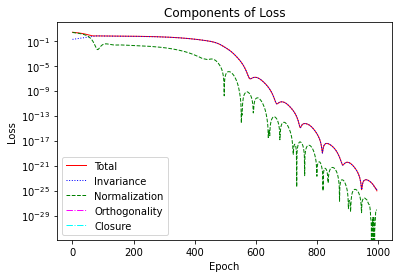

In [21]:
n       = 300
n_dim   = 3
n_gen   = 1    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 1000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)

struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle)

Generator: 
 tensor([[-9.4294e-05, -2.6586e-01, -3.4337e-01],
        [ 2.6617e-01, -4.4109e-04,  9.0074e-01],
        [ 3.4313e-01, -9.0083e-01, -4.6462e-04]]) 



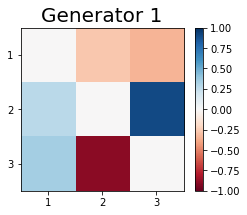

In [22]:
figsizeg = (4,3)
rows = 1
cols = 1

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

##  $n_{dim} = 3$, $n_{gen}=2$

Using cpu device
Epoch 1000   |  Train Loss: 0.4349958438779125
Total Time: 7.19608808
Complete.


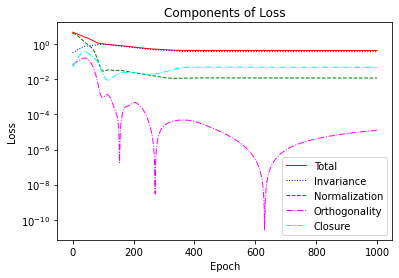

In [23]:
n       = 300
n_dim   = 3
n_gen   = 2    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 1000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)

struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle)

Generator 1: 
 tensor([[-0.1114, -0.2133, -0.0468],
        [ 1.1522,  0.2717,  0.3526],
        [ 0.5189,  0.2044, -0.0883]]) 

Generator 2: 
 tensor([[-0.0694,  0.2525, -0.5430],
        [-0.4542, -0.2047,  0.6336],
        [ 0.8776, -0.2759,  0.2969]]) 



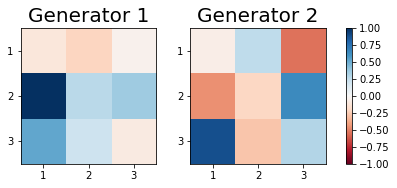

In [24]:
figsizeg = (8,2.5)
rows = 1
cols = 2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

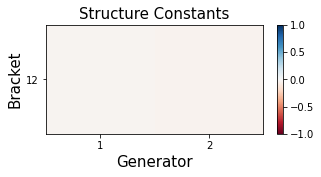

In [25]:
if n_gen>1:
    figsizec=(5,2)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [26]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.023499 -0.036512]
 
 C = 
  [[0.041530 0.060274 -0.249657]
 [-0.026947 -0.033871 -0.210613]
 [0.099513 0.309684 -0.005136]] 

The structure constants were NOT found successfully with a mean absolute error (MAE) of 0.11524720060601015. 
 

Total MAE = 0.11524720060601015


In [27]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.0836147965 rad, 85.2036250222 deg


##  $n_{dim} = 3$, $n_{gen}=3$

Using cpu device
Epoch 1000   |  Train Loss: 1.0663575439514303e-05
Total Time: 9.00038004
Complete.


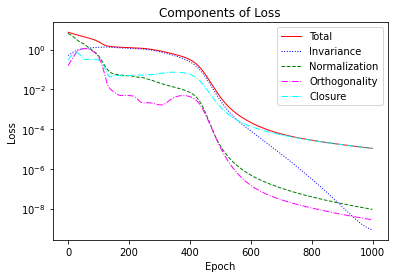

In [28]:
n       = 300
n_dim   = 3
n_gen   = 3    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 1000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)

struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle)

Generator 1: 
 tensor([[-4.7289e-04, -8.3947e-01, -5.0914e-01],
        [ 8.3956e-01, -3.6253e-04,  1.8964e-01],
        [ 5.0900e-01, -1.9004e-01, -1.6280e-04]]) 

Generator 2: 
 tensor([[-4.5512e-04,  5.4306e-01, -7.9824e-01],
        [-5.4287e-01, -1.8588e-04,  2.6079e-01],
        [ 7.9836e-01, -2.6033e-01, -3.5481e-04]]) 

Generator 3: 
 tensor([[-7.1503e-05, -1.9059e-02, -3.2183e-01],
        [ 1.8764e-02, -4.3666e-04, -9.4663e-01],
        [ 3.2186e-01,  9.4662e-01, -4.8628e-04]]) 



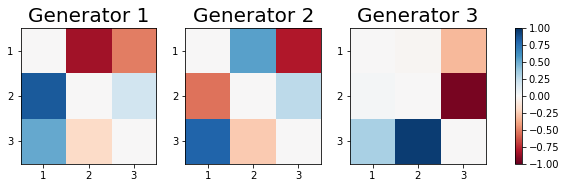

In [29]:
figsizeg = (12,2.5)
rows = 1
cols = 3

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

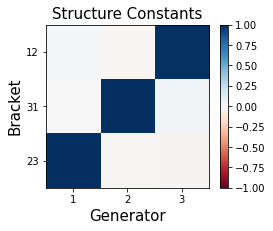

In [30]:
if n_gen>1:
    figsizec=(4,3)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [31]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [0.017815 -0.023160 0.984890]
 
 C = 
  [[-0.000317 0.026862 -0.014158]
 [-0.027634 0.000832 -0.011666]
 [0.014358 0.011576 0.000459]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.011984755043286244. 
 

31: 
 Structure Constants = [-0.003899 1.009901 0.025461]
 
 C = 
  [[0.000270 -0.008417 0.013760]
 [0.007870 0.000831 0.021938]
 [-0.014479 -0.022601 -0.000074]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.010026740119474126. 
 

23: 
 Structure Constants = [1.017229 -0.007850 -0.024331]
 
 C = 
  [[0.000338 0.018127 -0.004934]
 [-0.018334 0.000939 -0.024371]
 [0.005708 0.024127 -0.000293]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.010796919305456357. 
 

Total MAE = 0.03280841446821672


In [32]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: -0.0000264038 rad, 90.0015128290 deg
Angle between generator 1 and 3: 0.0000114697 rad, 89.9993428343 deg
Angle between generator 2 and 3: -0.0000225576 rad, 90.0012924545 deg


##  $n_{dim} = 3$, $n_{gen}=4$

Using cpu device
Epoch 1000   |  Train Loss: 1.598321480112264
Total Time: 10.24806404
Complete.


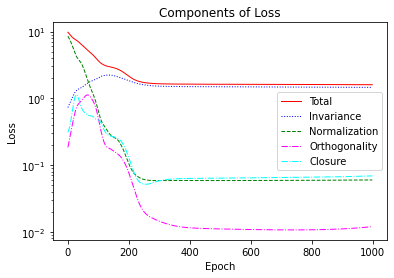

In [33]:
n       = 300
n_dim   = 3
n_gen   = 4    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 1000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)

struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle)

Generator 1: 
 tensor([[-0.1416,  0.1509,  0.8289],
        [ 0.6831,  0.3105,  0.3267],
        [ 0.6083,  0.0458, -0.2266]]) 

Generator 2: 
 tensor([[-0.0183,  0.1362, -0.1948],
        [-0.8793,  0.0277,  0.8003],
        [ 0.6530,  0.0184, -0.0775]]) 

Generator 3: 
 tensor([[-0.6086, -0.3305, -0.5258],
        [ 0.2922, -0.0009, -0.2568],
        [ 0.6590,  0.3707,  0.6527]]) 

Generator 4: 
 tensor([[ 0.1182,  0.3191,  0.5471],
        [-0.5982, -0.3078, -0.9003],
        [ 0.3882,  0.2366,  0.1132]]) 



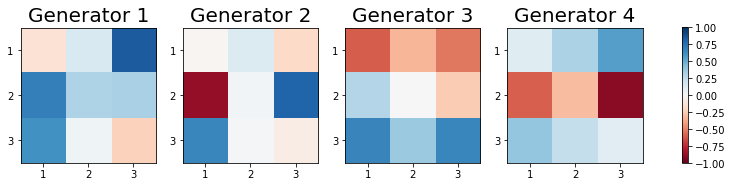

In [34]:
figsizeg = (16,2.5)
rows = 1
cols = 4

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

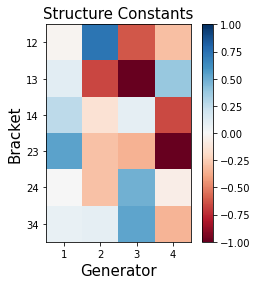

In [35]:
if n_gen>1:
    figsizec=(4,4)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [36]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.028977 0.731030 -0.618586 -0.301201]
 
 C = 
  [[0.102402 -0.234010 0.016557]
 [-0.039328 0.090535 -0.014276]
 [-0.007447 0.267717 -0.141150]] 

The structure constants were NOT found successfully with a mean absolute error (MAE) of 0.10149130736461287. 
 

13: 
 Structure Constants = [0.105257 -0.671684 -1.489383 0.381530]
 
 C = 
  [[0.187102 0.034090 -0.139952]
 [0.089368 -0.035054 -0.061656]
 [0.144885 -0.060193 -0.098369]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.09451872078092387. 
 

14: 
 Structure Constants = [0.261618 -0.143765 0.088900 -0.661277]
 
 C = 
  [[-0.152540 0.183011 -0.034082]
 [-0.031703 0.146096 -0.019260]
 [-0.086137 0.103304 -0.042612]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.08874944358130618. 
 

23: 
 Structure Constants = [0.535219 -0.293745 -0.349888 -1.132231]
 
 C = 
  [[-0.044561 0.240339 -0.112699]
 [0.043808 0.045321 -0.03358

In [37]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.3532492899 rad, 69.3138145075 deg
Angle between generator 1 and 3: 0.1537606897 rad, 81.1550725994 deg
Angle between generator 1 and 4: -0.9934423657 rad, 173.4347866668 deg
Angle between generator 2 and 3: 0.6524143378 rad, 49.2761190995 deg
Angle between generator 2 and 4: -0.3093836036 rad, 108.0220875192 deg
Angle between generator 3 and 4: -0.2037351566 rad, 101.7554663339 deg


# Orthogonal Groups: Figures 7-12: $n_{dim} = 4$, $n_{gen}=2,3,4,6$

##  $n_{dim} = 4$, $n_{gen} =2$

Using cpu device
Epoch 1000   |  Train Loss: 7.816063058442049e-05
Total Time: 4.82235312
Complete.


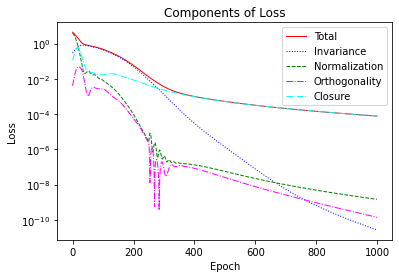

In [38]:
n       = 300
n_dim   = 4
n_gen   = 2    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 1000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)

struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle)

Generator 1: 
 tensor([[-2.6784e-04, -7.1591e-01, -8.3523e-02,  1.2982e-01],
        [ 7.1587e-01, -3.0111e-04, -2.6768e-01,  1.3029e-01],
        [ 8.3794e-02,  2.6770e-01, -2.2645e-04, -6.1239e-01],
        [-1.2986e-01, -1.3003e-01,  6.1243e-01, -2.0510e-04]]) 

Generator 2: 
 tensor([[-2.3347e-04,  3.3763e-02,  1.0861e-01,  6.7124e-01],
        [-3.3727e-02, -2.0133e-04, -6.2929e-01,  4.3247e-02],
        [-1.0888e-01,  6.2926e-01, -2.6789e-04,  3.7227e-01],
        [-6.7121e-01, -4.3505e-02, -3.7232e-01, -2.9619e-04]]) 



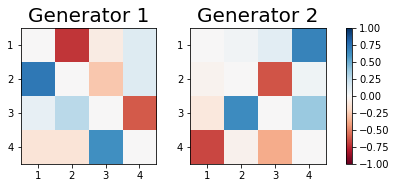

In [39]:
figsizeg = (8,2.5)
rows = 1
cols = 2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

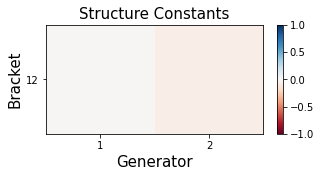

In [40]:
if n_gen>1:
    figsizec=(5,2)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [41]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.010168 -0.065657]
 
 C = 
  [[-0.000017 -0.005085 0.006405 0.045399]
 [0.005085 -0.000017 -0.044035 0.004033]
 [-0.006415 0.044032 -0.000023 0.018199]
 [-0.045394 -0.004053 -0.018195 -0.000019]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.015400318435753402. 
 

Total MAE = 0.015400318435753402


In [42]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: -0.0002136165 rad, 90.0122393248 deg


##  $n_{dim} = 4$, $n_{gen} =3$

Using cpu device
Epoch 1000   |  Train Loss: 2.60927323472498e-066
Total Time: 6.86446214
Complete.


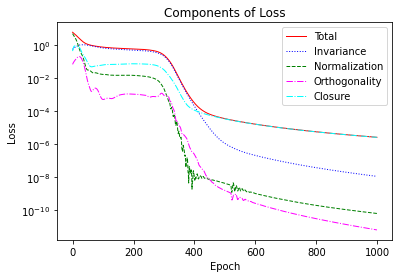

In [43]:
n       = 300
n_dim   = 4
n_gen   = 3    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 1000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)

struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle)

Generator 1: 
 tensor([[-1.3118e-04, -4.9082e-01,  2.6814e-01, -8.9692e-02],
        [ 4.9060e-01, -4.1440e-04,  1.9058e-01,  6.6668e-01],
        [-2.6829e-01, -1.9023e-01, -1.5681e-04, -4.4560e-01],
        [ 8.9270e-02, -6.6676e-01,  4.4546e-01, -3.2147e-04]]) 

Generator 2: 
 tensor([[-2.4282e-04,  1.3525e-01, -3.0036e-01,  6.0689e-01],
        [-1.3565e-01, -2.3209e-04, -3.2552e-01,  5.8196e-01],
        [ 3.0012e-01,  3.2540e-01, -1.3683e-04,  2.8030e-01],
        [-6.0692e-01, -5.8215e-01, -2.7992e-01, -3.8457e-04]]) 

Generator 3: 
 tensor([[-2.2276e-04, -4.9831e-01,  1.0637e-01,  4.2192e-01],
        [ 4.9832e-01, -2.8858e-04,  5.4742e-01, -1.9142e-01],
        [-1.0683e-01, -5.4729e-01, -2.6217e-04,  4.7546e-01],
        [-4.2178e-01,  1.9188e-01, -4.7540e-01, -2.2369e-04]]) 



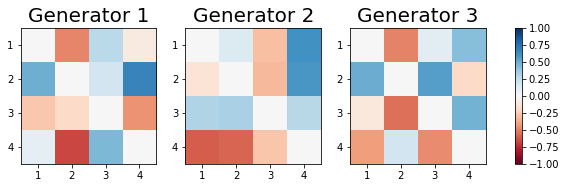

In [44]:
figsizeg = (12,2.5)
rows = 1
cols = 3

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

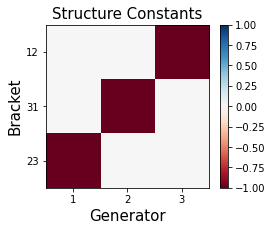

In [45]:
if n_gen>1:
    figsizec=(4,3)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [46]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [0.000035 0.000022 -1.000488]
 
 C = 
  [[0.000153 -0.011518 -0.004810 -0.012246]
 [0.011882 -0.000497 -0.009045 0.002244]
 [0.004721 0.009857 -0.000374 0.012306]
 [0.012792 -0.002258 -0.011571 -0.000279]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.006659661495161783. 
 

31: 
 Structure Constants = [-0.000096 -1.000684 0.000048]
 
 C = 
  [[-0.000184 -0.002164 0.018479 0.006155]
 [0.001983 -0.000469 -0.012502 -0.003860]
 [-0.018892 0.012995 -0.000459 0.001859]
 [-0.005850 0.003047 -0.001129 0.000114]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.005633838595578139. 
 

23: 
 Structure Constants = [-0.997375 -0.000020 0.000310]
 
 C = 
  [[-0.000073 0.002468 0.008814 0.001967]
 [-0.002002 0.000037 -0.005150 -0.002866]
 [-0.009295 0.005852 -0.000505 0.003237]
 [-0.002274 0.002295 -0.002911 -0.000480]] 

The structure constants were found successfully with a mean absolute e

In [47]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.6221225417 rad, 51.5287000723 deg
Angle between generator 1 and 3: -0.6546122372 rad, 130.8902542631 deg
Angle between generator 2 and 3: -0.6462875619 rad, 130.2622812195 deg


##  $n_{dim} = 4$, $n_{gen} =4$

Using cpu device
Epoch 1000   |  Train Loss: 1.3239255238998877e-06
Total Time: 10.02691889
Complete.


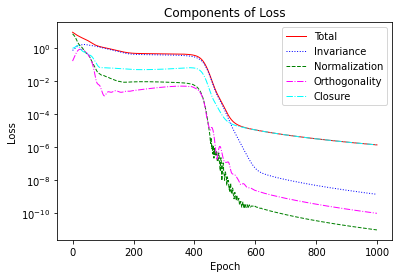

In [48]:
n       = 300
n_dim   = 4
n_gen   = 4    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 1000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)

struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle)

Generator 1: 
 tensor([[-3.0458e-04, -5.4563e-01,  5.5358e-01,  7.8925e-02],
        [ 5.4588e-01, -2.7884e-04, -4.9211e-01,  8.4913e-02],
        [-5.5331e-01,  4.9244e-01, -3.3932e-04, -3.7428e-01],
        [-7.9177e-02, -8.4703e-02,  3.7426e-01, -7.0967e-05]]) 

Generator 2: 
 tensor([[-2.8634e-04,  2.3303e-01, -3.4898e-02,  7.1381e-01],
        [-2.3327e-01, -1.6176e-04, -4.3037e-01,  3.0615e-01],
        [ 3.4525e-02,  4.3026e-01, -1.6699e-04,  3.9494e-01],
        [-7.1378e-01, -3.0652e-01, -3.9479e-01, -3.8455e-04]]) 

Generator 3: 
 tensor([[-1.4927e-04, -3.1266e-01,  3.6181e-01, -2.0877e-01],
        [ 3.1263e-01, -2.3829e-04,  3.5508e-01,  5.0012e-01],
        [-3.6174e-01, -3.5524e-01, -2.9968e-04,  5.9289e-01],
        [ 2.0881e-01, -5.0000e-01, -5.9300e-01, -3.2058e-04]]) 

Generator 4: 
 tensor([[-2.7317e-04,  6.2508e-01,  3.9058e-01, -6.3651e-02],
        [-6.2510e-01, -3.2432e-04,  1.5118e-01,  4.9030e-01],
        [-3.9051e-01, -1.5121e-01, -1.8222e-04, -4.3522e-01],
 

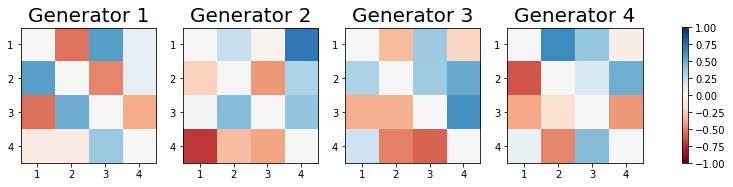

In [49]:
figsizeg = (16,2.5)
rows = 1
cols = 4

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

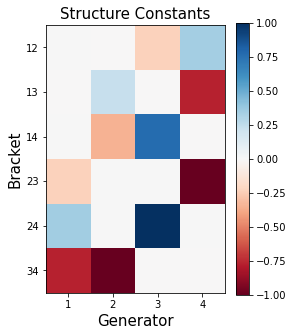

In [50]:
if n_gen>1:
    figsizec=(4,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [51]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [0.000374 -0.000011 -0.232015 0.343600]
 
 C = 
  [[0.000120 0.004451 0.000785 -0.008023]
 [-0.004447 0.000087 -0.007424 0.000087]
 [-0.000796 0.007407 -0.000064 0.003766]
 [0.007944 -0.000055 -0.003769 -0.000033]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.003078691607389243. 
 

13: 
 Structure Constants = [-0.000230 0.232086 -0.000024 -0.768508]
 
 C = 
  [[-0.000162 -0.005750 -0.007941 0.002766]
 [0.005745 -0.000440 0.002922 0.008165]
 [0.008327 -0.002926 0.000050 -0.005848]
 [-0.002342 -0.008075 0.005608 0.000017]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.004192752409990475. 
 

14: 
 Structure Constants = [0.000063 -0.344370 0.768488 -0.000015]
 
 C = 
  [[-0.000202 0.000442 -0.006740 -0.009082]
 [-0.000556 0.000129 -0.008403 0.006356]
 [0.006360 0.008789 0.000289 0.000853]
 [0.008994 -0.006989 -0.000463 0.000215]] 

The structure constants were found successful

In [52]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.1163210376 rad, 83.3201736622 deg
Angle between generator 1 and 3: -0.1774385488 rad, 100.2205979291 deg
Angle between generator 1 and 4: -0.2352128797 rad, 103.6041716320 deg
Angle between generator 2 and 3: 0.4087507892 rad, 65.8736145397 deg
Angle between generator 2 and 4: 0.2213099413 rad, 77.2140162002 deg
Angle between generator 3 and 4: 0.2250441331 rad, 76.9945266385 deg


##  $n_{dim} = 4$, $n_{gen} =6$

Using cpu device
Epoch 1000   |  Train Loss: 1.9865113193112482e-10
Total Time: 33.77705812
Complete.


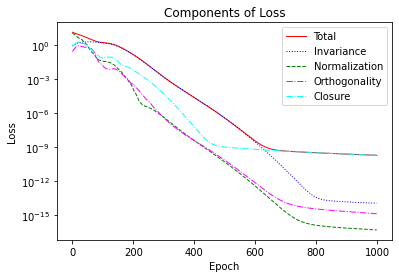

In [53]:
n       = 300
n_dim   = 4
n_gen   = 6    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 1000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)

struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle)

Generator 1: 
 tensor([[-6.5870e-05, -2.5653e-01, -2.2959e-01,  1.1484e-01],
        [ 2.5649e-01, -4.7260e-05, -1.6683e-01,  2.8756e-02],
        [ 2.2974e-01,  1.6680e-01, -4.6007e-04, -9.1631e-01],
        [-1.1464e-01, -2.8574e-02,  9.1634e-01, -4.2680e-04]]) 

Generator 2: 
 tensor([[-2.5203e-04, -1.4365e-01,  1.4752e-01,  6.7946e-01],
        [ 1.4359e-01, -2.3611e-04, -6.3296e-01,  2.2574e-01],
        [-1.4757e-01,  6.3293e-01, -2.3338e-04,  2.1062e-01],
        [-6.7946e-01, -2.2578e-01, -2.1057e-01, -2.7846e-04]]) 

Generator 3: 
 tensor([[-2.3658e-04, -8.1794e-02,  1.3800e-01,  6.6889e-01],
        [ 8.1964e-02, -2.6544e-04,  6.1561e-01, -3.8100e-01],
        [-1.3802e-01, -6.1562e-01, -2.0035e-04, -5.1836e-02],
        [-6.6887e-01,  3.8103e-01,  5.1979e-02, -2.9761e-04]]) 

Generator 4: 
 tensor([[-4.3575e-04,  7.8144e-01, -4.3235e-01,  2.7200e-01],
        [-7.8148e-01, -3.6594e-04,  1.0418e-01,  3.3218e-01],
        [ 4.3245e-01, -1.0382e-01, -1.0251e-04, -8.4840e-02],
 

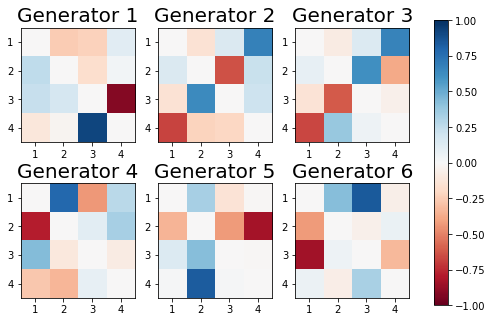

In [54]:
figsizeg = (10,5.25)
rows = 2
cols = 3

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

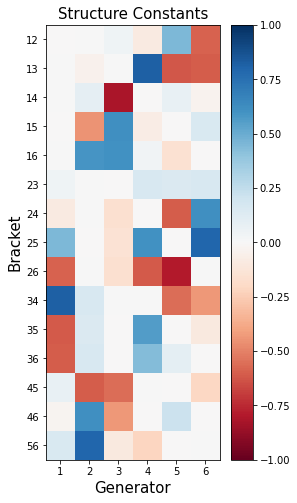

In [55]:
if n_gen>1:
    figsizec=(4,8)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [56]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.000012 0.000009 0.043501 -0.092296 0.448731 -0.587432]
 
 C = 
  [[-0.000399 0.000029 -0.000257 0.000077]
 [-0.000044 0.000074 -0.000532 0.000268]
 [0.000375 -0.000238 -0.000213 0.000203]
 [0.000411 -0.000169 0.000066 0.000351]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.00023171322422674143. 
 

13: 
 Structure Constants = [0.000012 -0.043545 0.000003 0.818995 -0.617640 -0.602353]
 
 C = 
  [[-0.000159 0.000350 0.000013 0.000144]
 [-0.000435 0.000068 -0.000758 -0.001023]
 [-0.000136 0.000786 -0.000365 0.000119]
 [-0.000276 0.000836 0.000074 0.000011]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.00034699041902803057. 
 

14: 
 Structure Constants = [0.000003 0.092211 -0.819095 -0.000146 0.074736 -0.032156]
 
 C = 
  [[-0.000117 0.000545 0.000586 0.000156]
 [-0.000723 -0.000331 0.000293 0.000508]
 [-0.001413 0.000047 -0.000204 -0.000390]
 [0.000130 0.000333 0.000494 -

In [57]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: -0.1384408347 rad, 97.9576341066 deg
Angle between generator 1 and 3: 0.0385663282 rad, 87.7897640277 deg
Angle between generator 1 and 4: -0.0758592651 rad, 94.3505952266 deg
Angle between generator 1 and 5: -0.1776949982 rad, 100.2355286625 deg
Angle between generator 1 and 6: 0.2579541942 rad, 75.0512941747 deg
Angle between generator 2 and 3: 0.9173460569 rad, 23.4588735699 deg
Angle between generator 2 and 4: 0.2849362788 rad, 73.4449602979 deg
Angle between generator 2 and 5: -0.5772344390 rad, 125.2562619734 deg
Angle between generator 2 and 6: 0.4539449415 rad, 63.0029295652 deg
Angle between generator 3 and 4: 0.4889397637 rad, 60.7290808878 deg
Angle between generator 3 and 5: -0.3235302884 rad, 108.8765567112 deg
Angle between generator 3 and 6: 0.5077728099 rad, 59.4844087235 deg
Angle between generator 4 and 5: 0.0446891031 rad, 87.4386499665 deg
Angle between generator 4 and 6: 0.7658878181 rad, 40.0139589624 deg
Angle between generator 5 

---

# Lorentz Groups: Figures 14-22: $n_{dim} = 4$, $n_{gen}=2,3,4,6$

##  Non-Abelian: $n_{dim} = 4$, $n_{gen} =2$

Using cpu device
Epoch 1000   |  Train Loss: 5.005747282940047e-05
Total Time: 7.44486284
Complete.


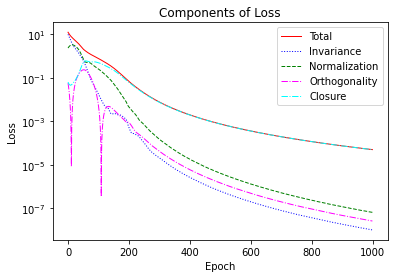

In [58]:
n       = 300
n_dim   = 4
n_gen   = 2    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 1000
oracle = oracle_lorentz

# Set Random Seeds
np.random.seed(10)
torch.manual_seed(0)

struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle)

Generator 1: 
 tensor([[ 4.2764e-04, -6.2651e-02, -8.1735e-01,  4.2870e-01],
        [-6.2824e-02, -2.0143e-05,  1.7029e-01, -5.4207e-02],
        [-8.1719e-01, -1.7023e-01,  2.6695e-04,  3.3479e-01],
        [ 4.2896e-01,  5.4236e-02, -3.3508e-01,  4.1791e-05]]) 

Generator 2: 
 tensor([[ 2.4646e-04,  5.7691e-01,  1.7001e-01,  3.5942e-01],
        [ 5.7680e-01, -1.8718e-05, -6.1024e-01, -3.0964e-02],
        [ 1.7050e-01,  6.1035e-01, -2.3739e-04,  3.6835e-01],
        [ 3.5936e-01,  3.0946e-02, -3.6831e-01, -5.1978e-06]]) 



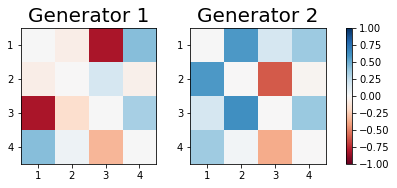

In [59]:
figsizeg = (8,2.5)
rows = 1
cols = 2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

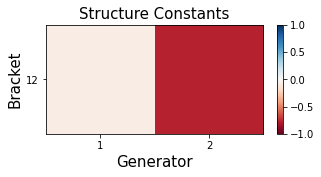

In [60]:
if n_gen>1:
    figsizec=(5,2)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [61]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.072038 -0.772798]
 
 C = 
  [[-0.000217 -0.034555 -0.024549 -0.016101]
 [-0.034901 -0.000062 0.011165 -0.030657]
 [-0.025070 -0.010834 0.000323 -0.019515]
 [-0.016302 0.030600 0.019674 -0.000003]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.017158072265426375. 
 

Total MAE = 0.017158072265426375


In [62]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.1243719188 rad, 82.8555136589 deg


## Abelian: $n_{dim} = 4$, $n_{gen} =2$

Using cpu device
Epoch 1000   |  Train Loss: 0.0007328563761402995
Total Time: 7.74097109
Complete.


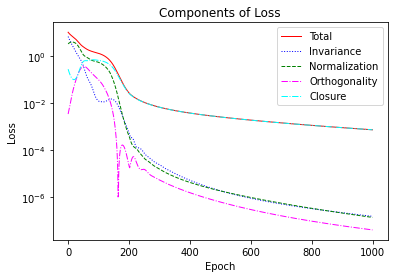

In [63]:
n       = 300
n_dim   = 4
n_gen   = 2    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 1000
oracle = oracle_lorentz

# Set Random Seeds
np.random.seed(7)
torch.manual_seed(0)

struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle)

Generator 1: 
 tensor([[ 3.6107e-04, -1.5040e-01, -4.2342e-01,  7.3641e-01],
        [-1.5062e-01, -5.8220e-05,  2.5819e-01, -1.4123e-01],
        [-4.2303e-01, -2.5804e-01, -2.9626e-05,  4.1137e-01],
        [ 7.3651e-01,  1.4122e-01, -4.1154e-01,  1.8739e-04]]) 

Generator 2: 
 tensor([[ 1.6137e-04,  4.5864e-01,  1.2221e-01,  2.6342e-01],
        [ 4.5858e-01, -2.1601e-04, -7.7838e-01, -2.0346e-01],
        [ 1.2262e-01,  7.7845e-01, -3.1391e-04,  2.4042e-01],
        [ 2.6340e-01,  2.0334e-01, -2.4051e-01, -1.0529e-05]]) 



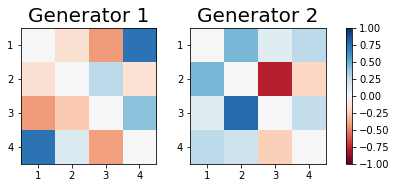

In [64]:
figsizeg = (8,2.5)
rows = 1
cols = 2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

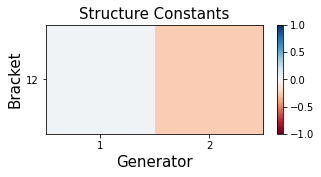

In [65]:
if n_gen>1:
    figsizec=(5,2)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [66]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [0.038635 -0.257794]
 
 C = 
  [[-0.000118 -0.061242 -0.021949 -0.017326]
 [-0.061182 -0.000011 -0.084640 -0.042073]
 [-0.022086 0.084763 -0.000001 0.006862]
 [-0.017289 0.041972 -0.006917 0.000014]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.029277796700396125. 
 

Total MAE = 0.029277796700396125


In [67]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.9680933022 rad, 14.5124292757 deg


## $n_{dim} = 4$, $n_{gen} =3$

Using cpu device
Epoch 1000   |  Train Loss: 8.765123163630057e-06
Total Time: 8.13212276
Complete.


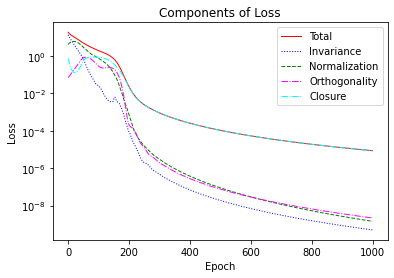

In [68]:
n       = 300
n_dim   = 4
n_gen   = 3    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 1000
oracle = oracle_lorentz

# Set Random Seeds
np.random.seed(7)
torch.manual_seed(0)

struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle)

Generator 1: 
 tensor([[ 4.2918e-04, -4.3684e-02, -9.2358e-01,  2.1980e-02],
        [-4.3493e-02, -4.4355e-05, -2.1332e-01, -2.2356e-01],
        [-9.2360e-01,  2.1330e-01,  3.7930e-04, -2.2164e-01],
        [ 2.1762e-02,  2.2360e-01,  2.2156e-01, -5.0467e-05]]) 

Generator 2: 
 tensor([[ 2.8894e-04, -6.9227e-01,  2.1960e-01,  2.2717e-01],
        [-6.9240e-01,  4.2384e-05, -6.2786e-01,  1.1745e-02],
        [ 2.1912e-01,  6.2771e-01, -1.8657e-04, -1.6329e-01],
        [ 2.2722e-01, -1.1801e-02,  1.6335e-01,  1.2337e-05]]) 

Generator 3: 
 tensor([[ 2.5313e-04, -2.0521e-01, -5.7495e-02, -6.7827e-01],
        [-2.0505e-01, -2.3439e-05, -2.0867e-01, -2.1823e-01],
        [-5.7967e-02,  2.0881e-01, -2.2211e-04,  6.3509e-01],
        [-6.7828e-01,  2.1824e-01, -6.3510e-01,  4.4245e-06]]) 



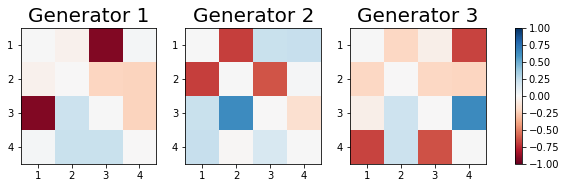

In [69]:
figsizeg = (12,2.5)
rows = 1
cols = 3

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

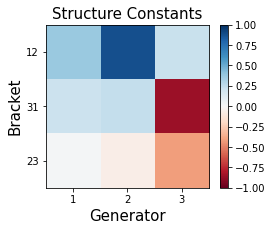

In [70]:
if n_gen>1:
    figsizec=(4,3)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [71]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [0.370181 0.876128 0.222300]
 
 C = 
  [[0.000160 -0.009650 -0.004262 -0.012082]
 [-0.009048 -0.000120 -0.012410 0.022002]
 [-0.004845 0.013058 -0.000413 0.012011]
 [-0.012371 -0.021848 -0.012339 -0.000031]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.009165693669410228. 
 

31: 
 Structure Constants = [0.212980 0.238447 -0.856486]
 
 C = 
  [[-0.000263 0.022833 -0.006998 -0.003803]
 [0.022635 0.000038 0.012837 0.005627]
 [-0.006607 -0.013005 0.000127 0.002013]
 [-0.004303 -0.005521 -0.002516 -0.000081]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.006825446746632673. 
 

23: 
 Structure Constants = [0.021564 -0.065980 -0.417866]
 
 C = 
  [[-0.000125 -0.006823 -0.007623 0.014406]
 [-0.006832 -0.000004 -0.010918 -0.002205]
 [-0.007393 0.010913 0.000104 -0.015669]
 [0.014565 0.002179 0.015820 0.000024]] 

The structure constants were found successfully with a mean absolute 

In [72]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: -0.7101823203 rad, 135.2497513485 deg
Angle between generator 1 and 3: 0.9997014403 rad, 1.4001159537 deg
Angle between generator 2 and 3: -0.6980670439 rad, 134.2721276563 deg


## $n_{dim} = 4$, $n_{gen} =4$

Using cpu device
Epoch 1000   |  Train Loss: 9.284792959388855e-06
Total Time: 14.33191013
Complete.


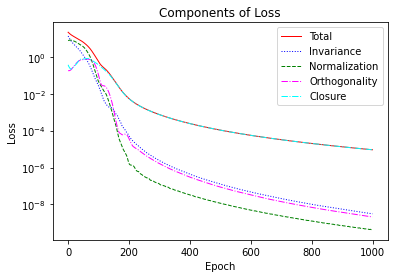

In [73]:
n       = 300
n_dim   = 4
n_gen   = 4    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 1000
oracle = oracle_lorentz

# Set Random Seeds
np.random.seed(2) # 7
torch.manual_seed(0)

struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle)

Generator 1: 
 tensor([[ 2.5608e-04, -2.8654e-01, -6.4546e-01, -1.1749e-01],
        [-2.8616e-01, -1.4792e-04, -5.5693e-01, -2.6451e-01],
        [-6.4557e-01,  5.5703e-01, -3.3928e-06, -3.2749e-01],
        [-1.1777e-01,  2.6473e-01,  3.2741e-01, -8.2019e-05]]) 

Generator 2: 
 tensor([[ 5.9041e-05,  5.2056e-02, -1.1697e-01,  3.2156e-01],
        [ 5.2306e-02, -3.0402e-04, -5.3505e-01,  5.7142e-01],
        [-1.1678e-01,  5.3473e-01, -2.6509e-04,  5.1727e-01],
        [ 3.2160e-01, -5.7169e-01, -5.1699e-01, -2.4768e-04]]) 

Generator 3: 
 tensor([[ 2.6762e-04,  2.1822e-01,  3.1427e-04, -6.9825e-01],
        [ 2.1843e-01, -3.6216e-05, -1.6237e-01, -3.0909e-01],
        [-5.6023e-05,  1.6256e-01, -1.8695e-04,  5.8561e-01],
        [-6.9818e-01,  3.0885e-01, -5.8566e-01,  2.3992e-05]]) 

Generator 4: 
 tensor([[ 4.3011e-04,  8.3769e-01, -3.7446e-01, -1.0444e-01],
        [ 8.3764e-01,  3.2545e-04,  7.9932e-02,  2.4085e-01],
        [-3.7449e-01, -8.0181e-02,  2.1949e-05, -2.8758e-01],
 

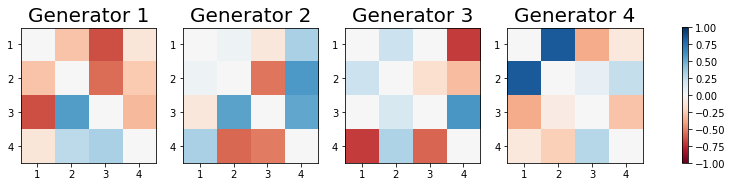

In [74]:
figsizeg = (16,2.5)
rows = 1
cols = 4

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

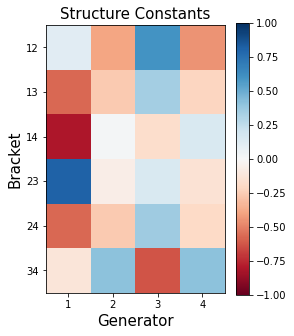

In [75]:
if n_gen>1:
    figsizec=(4,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [76]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [0.110587 -0.398373 0.599774 -0.451894]
 
 C = 
  [[-0.000115 0.002269 -0.006681 -0.009312]
 [0.001730 0.000336 -0.001102 0.001883]
 [-0.006754 0.000965 -0.000126 -0.000444]
 [-0.009326 -0.002119 0.000423 -0.000116]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.0027313520094939736. 
 

13: 
 Structure Constants = [-0.571460 -0.260328 0.342688 -0.211605]
 
 C = 
  [[0.000048 -0.004080 -0.012870 0.001953]
 [-0.004206 0.000107 0.012130 0.000642]
 [-0.013029 -0.012108 -0.000092 0.007543]
 [0.001817 -0.000669 -0.007610 -0.000120]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.004938942347709659. 
 

14: 
 Structure Constants = [-0.805354 0.020753 -0.179277 0.152225]
 
 C = 
  [[-0.000137 -0.003583 -0.016138 0.005004]
 [-0.004022 0.000248 0.014345 -0.002237]
 [-0.016578 -0.014041 -0.000175 0.010657]
 [0.005087 0.002072 -0.010899 0.000000]] 

The structure constants were found succ

In [77]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.0784454234 rad, 85.5007857881 deg
Angle between generator 1 and 3: 0.9900372299 rad, 8.0944791576 deg
Angle between generator 1 and 4: 0.9922423166 rad, 7.1414239732 deg
Angle between generator 2 and 3: 0.1378120140 rad, 82.0787433580 deg
Angle between generator 2 and 4: 0.1321416676 rad, 82.4066313250 deg
Angle between generator 3 and 4: 0.9991811003 rad, 2.3189032768 deg


## $n_{dim} = 4$, $n_{gen} =6$

Using cpu device
Epoch 2000   |  Train Loss: 4.51285043605216e-1010
Total Time: 56.81288099
Complete.


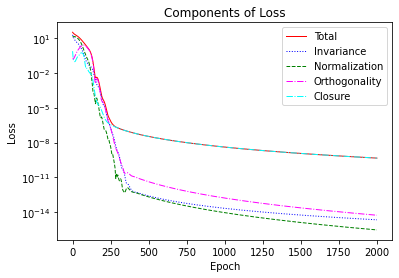

In [78]:
n       = 300
n_dim   = 4
n_gen   = 6    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 2000
oracle = oracle_lorentz

# Set Random Seeds
np.random.seed(2) # 7
torch.manual_seed(2)

struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle)

Generator 1: 
 tensor([[ 6.0488e-05, -9.4102e-02,  2.6665e-01, -2.0253e-01],
        [-9.4207e-02, -1.2159e-04, -4.8668e-01, -1.2327e-01],
        [ 2.6645e-01,  4.8675e-01, -3.9641e-04,  7.9176e-01],
        [-2.0276e-01,  1.2290e-01, -7.9188e-01, -3.0053e-04]]) 

Generator 2: 
 tensor([[ 4.0129e-04,  3.5752e-01, -6.9550e-01, -4.3709e-01],
        [ 3.5746e-01, -2.6270e-05, -1.5558e-01,  3.9511e-01],
        [-6.9550e-01,  1.5527e-01,  2.2124e-04,  1.3084e-01],
        [-4.3714e-01, -3.9529e-01, -1.3048e-01,  8.9082e-06]]) 

Generator 3: 
 tensor([[ 1.7747e-04, -4.8950e-01, -1.2818e-01, -3.1449e-01],
        [-4.8960e-01, -1.4041e-04,  7.2055e-01,  3.6533e-02],
        [-1.2794e-01, -7.2050e-01, -3.1367e-04,  3.5297e-01],
        [-3.1442e-01, -3.6125e-02, -3.5296e-01, -1.3513e-05]]) 

Generator 4: 
 tensor([[ 3.1324e-04,  7.1802e-01,  2.0505e-01, -2.6245e-01],
        [ 7.1822e-01,  7.7150e-05,  3.7956e-01, -4.6635e-01],
        [ 2.0474e-01, -3.7936e-01, -5.7061e-05,  1.1012e-01],
 

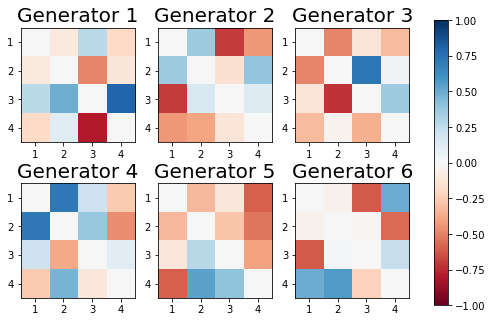

In [79]:
figsizeg = (10,5.25)
rows = 2
cols = 3

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

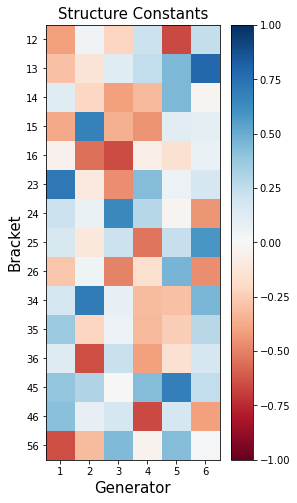

In [80]:
if n_gen>1:
    figsizec=(4,8)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [81]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.406658 0.033628 -0.216170 0.214566 -0.660873 0.239548]
 
 C = 
  [[-0.000124 -0.000983 0.000782 0.001065]
 [-0.000785 0.000138 0.000727 -0.000256]
 [0.001714 -0.001279 -0.000047 0.000139]
 [0.000665 0.000573 -0.000341 -0.000508]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.000632858031853249. 
 

13: 
 Structure Constants = [-0.295495 -0.130259 0.123361 0.246170 0.452054 0.781648]
 
 C = 
  [[-0.000465 0.000524 -0.001125 -0.000504]
 [0.000831 0.000071 -0.000058 -0.000233]
 [-0.000912 0.001126 -0.000019 0.000305]
 [-0.000556 0.000138 0.000431 0.000076]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.00046086653117842507. 
 

14: 
 Structure Constants = [0.118293 -0.206974 -0.408193 -0.324963 0.448559 -0.028869]
 
 C = 
  [[0.000050 0.000506 -0.000133 0.000380]
 [0.000167 -0.000304 -0.000321 -0.000362]
 [0.000293 0.000365 0.000274 -0.000289]
 [0.000612 -0.000006 0.000037 0

In [82]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.8312680209 rad, 33.7707844183 deg
Angle between generator 1 and 3: -0.5280941477 rad, 121.8767742846 deg
Angle between generator 1 and 4: 0.6766769711 rad, 47.4154875760 deg
Angle between generator 1 and 5: 0.7948397317 rad, 37.3598794793 deg
Angle between generator 1 and 6: 0.1712667464 rad, 80.1385214668 deg
Angle between generator 2 and 3: -0.4846719757 rad, 118.9909833862 deg
Angle between generator 2 and 4: 0.6311698367 rad, 50.8635162038 deg
Angle between generator 2 and 5: 0.5145757641 rad, 59.0308973125 deg
Angle between generator 2 and 6: 0.5622032412 rad, 55.7916960914 deg
Angle between generator 3 and 4: -0.0435189409 rad, 92.4942393723 deg
Angle between generator 3 and 5: -0.8603629414 rad, 149.3573583873 deg
Angle between generator 3 and 6: -0.4010714656 rad, 113.6451780727 deg
Angle between generator 4 and 5: 0.2924488139 rad, 72.9953800463 deg
Angle between generator 4 and 6: 0.4417182914 rad, 63.7864336217 deg
Angle between generator 5

---

# Squeeze Maps: Figures 23-25: $n_{dim}=2$, $n_{gen}=1$

## $n_{dim} = 2$, $n_{gen} =1$

Using cpu device
Epoch 1000   |  Train Loss: 4.472997926066667e-09
Total Time: 3.42841697
Complete.


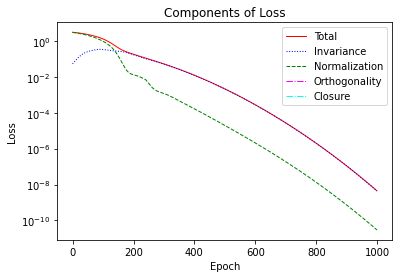

In [83]:
n       = 300
n_dim   = 2
n_gen   = 1    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 1000
oracle = oracle_squeeze

# Set Random Seeds
np.random.seed(2) # 7
torch.manual_seed(2)

struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle)

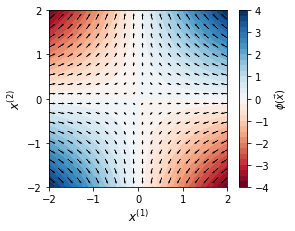

In [84]:
if n_dim==2:
    draw_sym_vectors(M = gens_pred[0], oracle=oracle)

Using cpu device
Epoch 1000   |  Train Loss: 979.0864924178779
Total Time: 2.49030781
Complete.


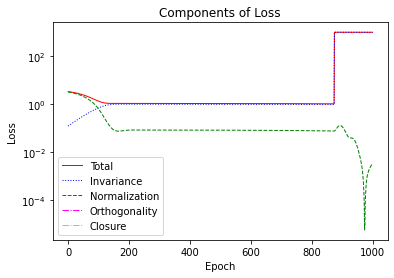

In [85]:
n       = 300
n_dim   = 2
n_gen   = 1    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 1000
oracle = oracle_piecewise_linear

# Set Random Seeds
np.random.seed(2) # 7
torch.manual_seed(2)

struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle)

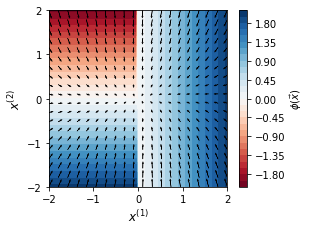

In [86]:
if n_dim==2:
    draw_sym_vectors(M = gens_pred[0], oracle=oracle)

Using cpu device
Epoch 1000   |  Train Loss: 0.7252410752432359
Total Time: 2.66462803
Complete.


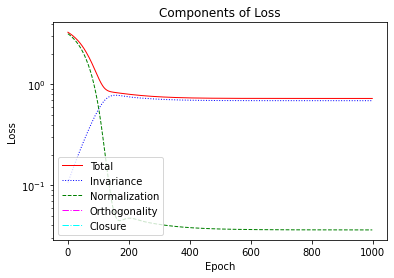

In [87]:
n       = 300
n_dim   = 2
n_gen   = 1    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 1000
oracle = oracle_manhattan

# Set Random Seeds
np.random.seed(2) # 7
torch.manual_seed(2)

struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle)

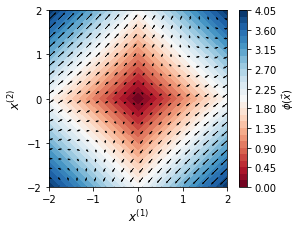

In [88]:
if n_dim==2:
    draw_sym_vectors(M = gens_pred[0], oracle=oracle)

---

# SO(10): Figure 26: $n_{dim} =10, n_{gen} = 45$

Using cpu device
Epoch 200   |  Train Loss: 0.0013397855645381981
Total Time: 45.36426401
Complete.


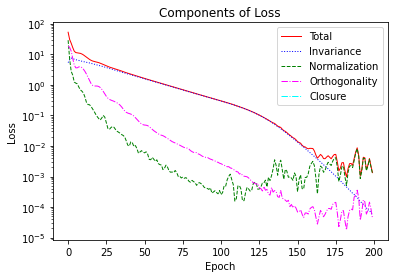

In [89]:
n       = 300
n_dim   = 10
n_gen   = 45    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 200
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0) # 7
torch.manual_seed(0)

struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle)

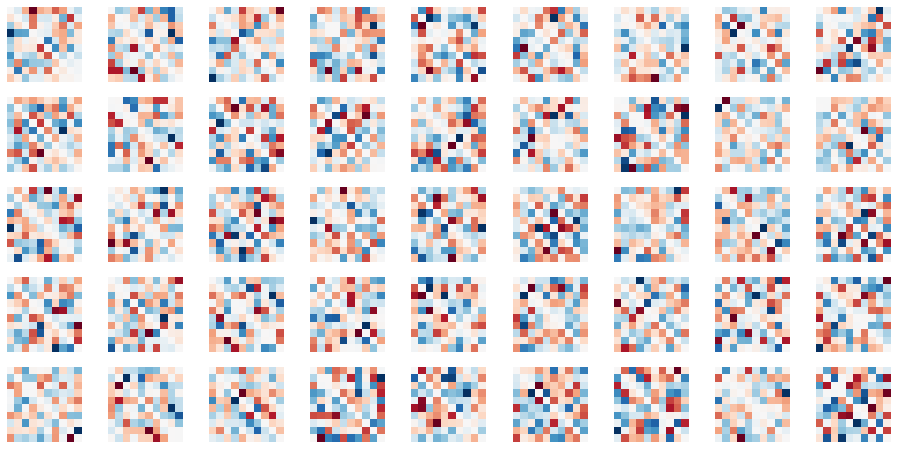

In [92]:
figsizeg = (16,8)
rows = 5
cols = 9

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)
plt.savefig('so10.png')